In [289]:
# import
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import h3

resolution = 9
def lat_lng_to_h3(lat, lng, resolution):
    # Convert latitude and longitude to H3 index
    h3_index = h3.geo_to_h3(lat, lng, resolution)
    return h3_index





In [290]:
# load data 
df = pd.read_csv('./bristol_density.csv')



In [291]:
# load data 
df1 = pd.read_csv('./Bristol charging points.csv')

In [292]:

hex_col = 'hex'+str(resolution)

# find hexs containing the points
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.Latitude,x.Longitude,resolution),1)
df1[hex_col] = df1.apply(lambda x: h3.geo_to_h3(x.Latitude,x.Longitude,resolution),1)


In [293]:
df1.columns

Index(['chargeDeviceID', 'reference', 'name', 'Latitude', 'Longitude',
       'subBuildingName', 'buildingName', 'buildingNumber', 'thoroughfare',
       'street',
       ...
       'connector8OutputCurrent', 'connector8RatedVoltage',
       'connector8ChargeMethod', 'connector8ChargeMode',
       'connector8TetheredCable', 'connector8Status', 'connector8Description',
       'connector8Validated', 'total_connectors', 'hex9'],
      dtype='object', length=160)

In [294]:
df.head()

,Count_point_id,Direction_of_travel,Year,Count_date,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles,hex9
0,18042,N,2014,2014-09-30 00:00:00,7,1,South West,E12000009,144,"Bristol, City of",...,345,39.0,15.0,7.0,1.0,5,6.0,73.0,1578.0,89195839063ffff
1,18042,N,2014,2014-09-30 00:00:00,8,1,South West,E12000009,144,"Bristol, City of",...,397,31.0,6.0,5.0,3.0,10,7.0,62.0,1777.0,89195839063ffff
2,18042,N,2014,2014-09-30 00:00:00,9,1,South West,E12000009,144,"Bristol, City of",...,328,38.0,9.0,10.0,0.0,12,11.0,80.0,1379.0,89195839063ffff
3,18042,N,2014,2014-09-30 00:00:00,10,1,South West,E12000009,144,"Bristol, City of",...,267,35.0,8.0,9.0,7.0,12,4.0,75.0,1180.0,89195839063ffff
4,18042,N,2014,2014-09-30 00:00:00,11,1,South West,E12000009,144,"Bristol, City of",...,267,32.0,9.0,14.0,0.0,21,7.0,83.0,1224.0,89195839063ffff


In [295]:
df1.head()

,chargeDeviceID,reference,name,Latitude,Longitude,subBuildingName,buildingName,buildingNumber,thoroughfare,street,...,connector8OutputCurrent,connector8RatedVoltage,connector8ChargeMethod,connector8ChargeMode,connector8TetheredCable,connector8Status,connector8Description,connector8Validated,total_connectors,hex9
0,ac7a21c48f5833b33a5b606b2089e6a9,CM167,NCP Prince Street Car Park,51.450340,-2.596704,NaN,NaN,NaN,NaN,Prince Street,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,89195876c97ffff
1,a999c0cab150490ffefb7ce9ec889830,CYC60469,Longwell Green Leisure Centre,51.449065,-2.500966,Aspects Leisure Park,Longwell Green Leisure Centre,NaN,NaN,Leisure Road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,891958382abffff
2,6928deac51a9dcc1f063ccec46d3c067,CYC60466,Bradley Stoke Leisure Centre,51.535657,-2.545928,NaN,Bradley Stoke Leisure Centre,NaN,NaN,Fiddlers Wood Ln,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8919580eb33ffff
3,a76a25b08df9964728e96bc8c8720e5d,60467,Memorial Woodlands,51.571359,-2.498436,NaN,Memorial Woodlands,Memorial Woodlands,Earthcott Road,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8919580ed93ffff
4,beab105a740056efe867b95bcb90b82d,CM22571,Cribbs Causeway Retail Park,51.526138,-2.600600,NaN,NaN,NaN,Lysander Road,Patchway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8919580c8cfffff


In [296]:
df['mean_car']=df.groupby(hex_col)['All_motor_vehicles'].transform('mean')
df1['total_charger']=df1.groupby(hex_col)['total_connectors'].transform('sum')

In [297]:
df[hex_col].value_counts()

hex9
89195876523ffff    504
8919586291bffff    480
89195877197ffff    480
89195862b1bffff    432
8919586504fffff    432
                  ... 
89195839367ffff     24
89195839037ffff     24
8919586196bffff     24
89195876aa3ffff     24
8919583946fffff     12
Name: count, Length: 337, dtype: int64

In [298]:
k = 2
for s_indexed in df1[hex_col].loc[0:10]:
    # Use the hex string directly without converting it to an integer
    neighboring = h3.k_ring(s_indexed, k)
    print('for ' +s_indexed )
    print("Neighbors:")
    for neighbor in neighboring:
        print(neighbor)

for 89195876c97ffff
Neighbors:
89195839223ffff
89195876c83ffff
89195876c8fffff
89195876c87ffff
89195876c8bffff
89195876cbbffff
8919583934bffff
89195876c9bffff
89195876cb3ffff
89195876c97ffff
89195876c93ffff
8919583934fffff
89195839227ffff
8919583935bffff
89195839343ffff
89195839353ffff
8919583922fffff
89195839267ffff
8919583922bffff
for 891958382abffff
Neighbors:
89195838207ffff
891958382abffff
891958382bbffff
89195838213ffff
891958382b3ffff
891958382a3ffff
891958382afffff
89195838237ffff
89195838233ffff
89195838203ffff
89195838217ffff
89195838223ffff
891958382b7ffff
891958383dbffff
8919583828fffff
8919583823bffff
891958382a7ffff
89195838287ffff
8919583820fffff
for 8919580eb33ffff
Neighbors:
8919580ebbbffff
8919580eba3ffff
8919580eb0fffff
8919580eb37ffff
8919580eba7ffff
8919580eb2fffff
8919580eb2bffff
8919580eb77ffff
8919580eb33ffff
8919583b6dbffff
8919580ebafffff
8919580eb27ffff
8919580eb03ffff
8919580eb07ffff
8919580ebabffff
8919583b6cbffff
8919580eb23ffff
8919580eb3bffff
8919580eb17

In [299]:
df2=df[[hex_col,'mean_car']]
df2=df2.drop_duplicates(subset=[hex_col, 'mean_car'])

In [300]:
df3=df1[[hex_col,'total_charger']]
df3=df3.drop_duplicates(subset=[hex_col, 'total_charger'])

In [301]:
df2=pd.merge(df2,df3[[hex_col,'total_charger']],on=hex_col,how='left')

In [302]:

df2.fillna(0, inplace=True)
#df2.to_csv('./Result.csv')


In [303]:
# calculate distance between two H3 cells
def calculate_grid_distance(start_index, end_index):
    # Calculate the grid distance between two H3 cells
    distance = h3.h3_distance(start_index, end_index)
    return distance


In [304]:
listofcharger1=df2[df2.total_charger>0][[hex_col,'total_charger']]

In [305]:
listofcharger1.head()

,hex9,total_charger
12,8919583901bffff,2.0
14,89195839357ffff,9.0
29,89195876c8bffff,2.0
55,89195862eb3ffff,4.0
77,89195876c5bffff,5.0


In [306]:



def getchargercount1(start_index,k=1):
    total=0
    charger_count=0
    neighboring = h3.k_ring(start_index, k)
    for n in neighboring:
        if n in listofcharger1[hex_col].to_list():
            total=total+1
            charger_count=charger_count+listofcharger1[listofcharger1[hex_col]==n]['total_charger'].values[0]
    return pd.Series([total, charger_count], index=['total_number_of_cell','charger_count'])



In [307]:
result=getchargercount1('871958390ffffff',0)
print(result)

total_number_of_cell    0
charger_count           0
dtype: int64


In [308]:
#it is a simple script to get the list of hexagons with chargers
listofcharger=df2[df2.total_charger>0][hex_col].to_list()

In [309]:
#it finds closest charging neighborhood
def calculate_min_grid_distance(start_index,listofcharger):
    low_distance=100
    for i in range(0,len(listofcharger)) :
        grid_distance = calculate_grid_distance(start_index, listofcharger[i])
        
        if grid_distance < low_distance:
            low_distance = grid_distance
            closest_charger = listofcharger[i]
    return pd.Series([low_distance, closest_charger], index=['min_k', 'min_k_hex'])



In [310]:
#testing distance
#result1=calculate_min_grid_distance('8a195839355ffff',listofcharger)
#print(result1[0])

In [311]:



def getchargercount(start_index,k=1):
    total=0
    neighboring = h3.k_ring(start_index, k)
    for n in neighboring:
        if n in listofcharger:
            total=total+1
    return total



In [312]:
df2[df2.total_charger>0].head( 100  )

,hex9,mean_car,total_charger
12,8919583901bffff,2878.967593,2.0
14,89195839357ffff,840.537037,9.0
29,89195876c8bffff,277.336111,2.0
55,89195862eb3ffff,94.208333,4.0
77,89195876c5bffff,1707.041667,5.0
81,89195876c43ffff,237.305556,3.0
86,89195860b83ffff,990.141667,3.0
90,89195839eb7ffff,1231.593750,11.0
91,8919583926fffff,945.358333,3.0
97,8919587652fffff,704.450000,2.0


In [313]:
df2[['min_k','min_k_hex']] = df2[hex_col].apply(lambda x: calculate_min_grid_distance(x, listofcharger)) 

In [314]:
df2['total_number_of_cell']=df2[[hex_col,'min_k']].apply(lambda x: getchargercount(x[hex_col],x['min_k']),axis=1)   

In [315]:
df2[['total_number_of_cell','charger_count']]=df2[[hex_col,'min_k']].apply(lambda x: getchargercount1(x[hex_col],x['min_k']),axis=1)   

In [316]:
def get_lat_lon(hexagon):
    vertices = h3.h3_to_geo_boundary(hexagon)
      
       # Calculate the centroid of the polygon
    centroid_lat = sum(point[0] for point in vertices) / len(vertices)
    centroid_lon = sum(point[1] for point in vertices) / len(vertices)
    return pd.Series([centroid_lat, centroid_lon], index=['lat', 'lon'])
     

In [317]:
df2[['lat','lon']]=df2[hex_col].apply(lambda x: get_lat_lon(x))   

In [318]:
df2.head(100)

,hex9,mean_car,total_charger,min_k,min_k_hex,total_number_of_cell,charger_count,lat,lon
0,89195839063ffff,951.817708,0.0,1,8919583907bffff,1.0,4.0,51.460298,-2.571517
1,89195876893ffff,1085.493056,0.0,3,89195876c73ffff,1.0,2.0,51.433606,-2.609120
2,89195839483ffff,2587.898148,0.0,6,8919583942fffff,1.0,6.0,51.491606,-2.544831
3,89195876c4bffff,1935.552778,0.0,1,89195876c5bffff,2.0,8.0,51.445984,-2.624746
4,89195877197ffff,3888.483333,0.0,21,8919587652fffff,1.0,2.0,51.480877,-2.704575
...,...,...,...,...,...,...,...,...,...
95,891958765d7ffff,619.983333,0.0,7,8919587652fffff,1.0,2.0,51.489376,-2.618417
96,891958391dbffff,653.333333,0.0,5,8919583901bffff,1.0,2.0,51.459076,-2.549617
97,8919587652fffff,704.450000,2.0,0,8919587652fffff,1.0,2.0,51.470789,-2.615316
98,891958765dbffff,32.204167,0.0,8,8919587652fffff,1.0,2.0,51.491536,-2.626244


In [319]:

import math

# Define the H3 resolution (level of detail)


# Get the length of one edge of the hexagon in meters
edge_length_meters = h3.edge_length(resolution, unit='m')

# Calculate the area of one hexagon
area_hexagon = ((3 * math.sqrt(3) / 2) * (edge_length_meters ** 2))/1000000

print("Area of one hexagon at resolution", resolution, ":", area_hexagon, "square kilometers")

df2['cars_density'] = df2['mean_car']/ area_hexagon

df2.head()

Area of one hexagon at resolution 9 : 0.07899937493696575 square kilometers


,hex9,mean_car,total_charger,min_k,min_k_hex,total_number_of_cell,charger_count,lat,lon,cars_density
0,89195839063ffff,951.817708,0.0,1,8919583907bffff,1.0,4.0,51.460298,-2.571517,12048.420751
1,89195876893ffff,1085.493056,0.0,3,89195876c73ffff,1.0,2.0,51.433606,-2.609120,13740.527142
2,89195839483ffff,2587.898148,0.0,6,8919583942fffff,1.0,6.0,51.491606,-2.544831,32758.463598
3,89195876c4bffff,1935.552778,0.0,1,89195876c5bffff,2.0,8.0,51.445984,-2.624746,24500.861929
4,89195877197ffff,3888.483333,0.0,21,8919587652fffff,1.0,2.0,51.480877,-2.704575,49221.697468


In [320]:
records = [{row[hex_col]: row['charger_count']} for index, row in df2[[hex_col, 'charger_count']].iterrows()]



In [321]:
import json


file_path = 'bristol_density.json'

# Write records to JSON file
with open(file_path, 'w') as json_file:
    json.dump(records, json_file, indent=4)

print(f"Records have been written to {file_path}")


Records have been written to bristol_density.json


In [322]:
import folium


# Initialize Folium map
m = folium.Map(location=[51.45498615600733, -2.594947745448589], zoom_start=12)

# Define H3 resolution (0 to 15)


# Define bounding box coordinates
min_lat, min_lon = -2.984188,  51.269558
max_lat, max_lon = -2.416278, 51.56

# Create GeoJSON-like polygon
geo_json_polygon = {
    "type": "Polygon",
    "coordinates": [
        [
            [min_lon, min_lat],
            [min_lon, max_lat],
            [max_lon, max_lat],
            [max_lon, min_lat],
            [min_lon, min_lat]
        ]
    ]
}

# Generate H3 cells covering the map area
hexagons = h3.polyfill(geo_json_polygon, resolution)

# Check if hexagons list is not empty
if hexagons:
    for hexagon in hexagons:
        vertices = h3.h3_to_geo_boundary(hexagon)
        
        folium.Polygon(locations=vertices, color='blue', fill=True, fill_color='yellow', fill_opacity=0.1).add_to(m)
      
       # Calculate the centroid of the polygon
        centroid_lat = sum(point[0] for point in vertices) / len(vertices)
        centroid_lon = sum(point[1] for point in vertices) / len(vertices)

        # Add label marker at the centroid of the polygon
        if hexagon.replace('0x', '') in df2[hex_col].values:
            label=df2.total_charger[df2[hex_col]==hexagon.replace('0x', '') .replace('0x', '')].values[0] 
        else:
             label=''
        folium.Marker(location=[centroid_lat, centroid_lon], icon=folium.DivIcon(html=f'<div><font size=3><b>{label}</b></div>')).add_to(m)

    # Save the map to an HTML file

    m.save('h3_map.html')
    print("Hexagons drawn successfully!")
    
else:
    print("No hexagons generated.")
    



Hexagons drawn successfully!


In [323]:
# only our h3 values
import folium


# Initialize Folium map
m = folium.Map(location=[51.45498615600733, -2.594947745448589], zoom_start=12)

# Define H3 resolution (0 to 15)


# Define bounding box coordinates
min_lat, min_lon = -2.984188,  51.269558
max_lat, max_lon = -2.416278, 51.56

# Create GeoJSON-like polygon
geo_json_polygon = {
    "type": "Polygon",
    "coordinates": [
        [
            [min_lon, min_lat],
            [min_lon, max_lat],
            [max_lon, max_lat],
            [max_lon, min_lat],
            [min_lon, min_lat]
        ]
    ]
}

# Generate H3 cells covering the map area
hexagons = h3.polyfill(geo_json_polygon, resolution)

# Check if hexagons list is not empty
if hexagons:
    for hexagon in hexagons:
        vertices = h3.h3_to_geo_boundary(hexagon)
        if hexagon.replace('0x', '') in df2[hex_col].values:
            folium.Polygon(locations=vertices, color='blue', fill=True, fill_color='yellow', fill_opacity=0.1).add_to(m)
        
        # Calculate the centroid of the polygon
            centroid_lat = sum(point[0] for point in vertices) / len(vertices)
            centroid_lon = sum(point[1] for point in vertices) / len(vertices)

        # Add label marker at the centroid of the polygon
           
            label=df2.total_charger[df2[hex_col]==hexagon.replace('0x', '') .replace('0x', '')].values[0] 
           
            folium.Marker(location=[centroid_lat, centroid_lon], icon=folium.DivIcon(html=f'<div><font size=3><b>{label}</b></div>')).add_to(m)

    # Save the map to an HTML file

    m.save('h3_map_Bristol.html')
    print("Hexagons drawn successfully!")
    
else:
    print("No hexagons generated.")
    



Hexagons drawn successfully!


In [324]:
# one h3 and neighbourhoods
import folium


# Initialize Folium map
m = folium.Map(location=[51.45498615600733, -2.594947745448589], zoom_start=12)

# Define H3 resolution (0 to 15)

# Define the central hexagon
central_hexagon = '871958390ffffff'

# Generate H3 cells covering the map area in k-rings
hexagons = h3.k_ring(central_hexagon, 2)

# Sort the hexagons based on their distance from the central hexagon
sorted_hexagons = sorted(hexagons, key=lambda x: h3.h3_distance(central_hexagon, x))

# Print the sorted hexagons
for i, hexagon in enumerate(sorted_hexagons):
    print(f"Index {i}: {hexagon}")


# Check if hexagons list is not empty
if sorted_hexagons:
    label=0
    for hexagon in sorted_hexagons:
        vertices = h3.h3_to_geo_boundary(hexagon)
       # Add polygon to map
        folium.Polygon(locations=vertices, color='blue', fill=True, fill_color='yellow', fill_opacity=0.1).add_to(m)
        
        # Calculate the centroid of the polygon
        centroid_lat = sum(point[0] for point in vertices) / len(vertices)
        centroid_lon = sum(point[1] for point in vertices) / len(vertices)

        # Add label marker at the centroid of the polygon
           
        folium.Marker(location=[centroid_lat, centroid_lon], icon=folium.DivIcon(html=f'<div><font size=3><b>{label}</b></div>')).add_to(m)
        label=label+1
    # Save the map to an HTML file

    m.save('h3_map_nd.html')
    print("Hexagons drawn successfully!")
    
else:
    print("No hexagons generated.")
    



Index 0: 871958390ffffff
Index 1: 871958394ffffff
Index 2: 871958391ffffff
Index 3: 871958392ffffff
Index 4: 871958396ffffff
Index 5: 871958393ffffff
Index 6: 871958395ffffff
Index 7: 8719580c9ffffff
Index 8: 87195876cffffff
Index 9: 871958765ffffff
Index 10: 87195876dffffff
Index 11: 871958382ffffff
Index 12: 87195839cffffff
Index 13: 871958761ffffff
Index 14: 871958386ffffff
Index 15: 8719583b3ffffff
Index 16: 87195839effffff
Index 17: 8719583b2ffffff
Index 18: 8719580cbffffff
Hexagons drawn successfully!


In [325]:
df2.to_csv('./closest_chargers.csv', index=False)

In [326]:
#testing
result=getchargercount('871958390ffffff',1)
print(result)

0


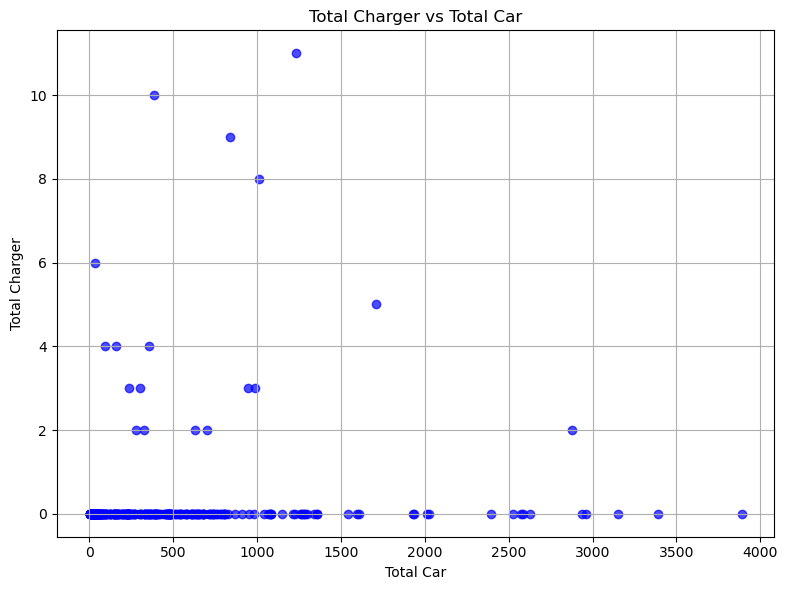

In [327]:
import matplotlib.pyplot as plt

# Define your data
mean_car = df2.mean_car.to_list()
total_charger = df2.total_charger.to_list()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mean_car, total_charger, color='blue', marker='o', alpha=0.7)

# Add labels and title
plt.title('Total Charger vs Total Car')
plt.xlabel('Total Car')
plt.ylabel('Total Charger')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [328]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the data
mean_car = df2.mean_car.to_list()
total_charger = df2.total_charger.to_list()
# Convert lists to numpy arrays
X = np.array(mean_car).reshape(-1, 1)  # Feature matrix
y = np.array(total_charger)             # Target vector

# Define polynomial features
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.00000000e+00  7.74126181e-04 -2.30900558e-07]
Intercept: 0.03401782099891376
